In [12]:
import pandas as pd
import subprocess
from IPython.display import display, Image

In [13]:

class NFA:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

In [14]:
def create_nfa():
    states = {'q0', 'q1'}
    alphabet = {'0', '1'}
    transitions = {
        ('q0', '0'): {'q0'},
        ('q0', '1'): {'q0', 'q1'},
        ('q1', '0'): {'q1'},
        ('q1', '1'): {'q1'},
    }
    start_state = 'q0'
    accept_states = {'q1'}

    return NFA(states, alphabet, transitions, start_state, accept_states)

In [15]:
def display_nfa_table(nfa):
    df = pd.DataFrame(columns=['State'] + list(nfa.alphabet) + ['Accept'])

    for state in nfa.states:
        row = [state]
        for symbol in nfa.alphabet:
            next_states = nfa.transitions.get((state, symbol), set())
            row.append(', '.join(sorted(next_states)))
        row.append('Yes' if state in nfa.accept_states else 'No')
        df = df.append(pd.Series(row, index=df.columns), ignore_index=True)

    display(df)

In [16]:
def display_nfa_diagram(nfa):
    dot = f'digraph NFA {{\nrankdir=LR;\nstart [shape=point];\nstart -> {nfa.start_state};\n'

    for (current_state, symbol), next_states in nfa.transitions.items():
        for next_state in next_states:
            dot += f'{current_state} -> {next_state} [label="{symbol}"];\n'

    for accept_state in nfa.accept_states:
        dot += f'{accept_state} [shape=doublecircle];\n'

    dot += '}'

    file_path = "nfa_diagram"
    dot_file_path = f"{file_path}.dot"
    png_file_path = f"{file_path}.png"

    # Write DOT file
    with open(dot_file_path, 'w') as dot_file:
        dot_file.write(dot)

    try:
        # Convert DOT to PNG using the dot command
        subprocess.run(['dot', '-Tpng', dot_file_path, '-o', png_file_path, '-Gdpi=300'], check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error executing 'dot' command: {e}")
        return

    # Display the PNG image
    display(Image(filename=png_file_path))

C:\Users\tahsi\AppData\Local\Temp\ipykernel_17452\1240370264.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row, index=df.columns), ignore_index=True)
C:\Users\tahsi\AppData\Local\Temp\ipykernel_17452\1240370264.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(row, index=df.columns), ignore_index=True)


,State,1,0,Accept
0,q1,q1,q1,Yes
1,q0,"q0, q1",q0,No


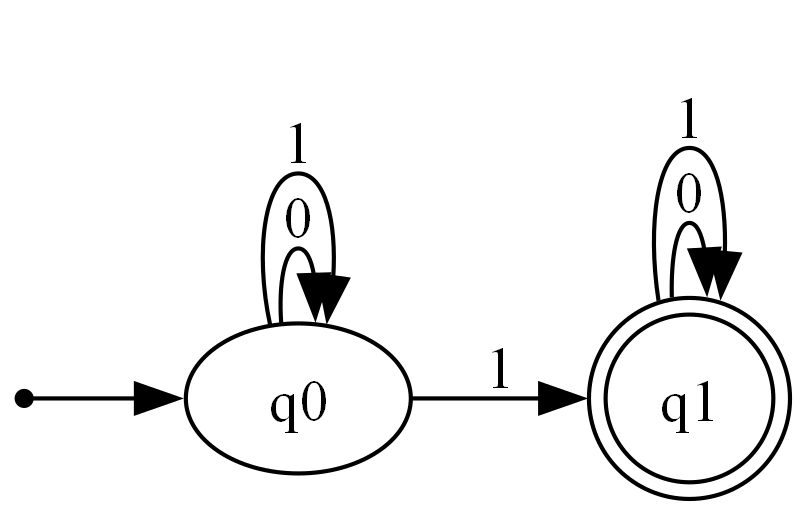

In [18]:
# Create and display the NFA
nfa = create_nfa()
display_nfa_table(nfa)
display_nfa_diagram(nfa)